80134624/80134624 [==============================] - 3s 0us/step
Found 512 images belonging to 16 classes.
Found 64 images belonging to 16 classes.
Found 64 images belonging to 16 classes.
Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 6.4273 - accuracy: 0.5820 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 311s 19s/step - loss: 6.4273 - accuracy: 0.5820 - val_loss: 5.6661 - val_accuracy: 0.7969 - lr: 1.0000e-04
Epoch 2/20
16/16 [==============================] - 13s 760ms/step - loss: 4.8758 - accuracy: 0.9629 - val_loss: 4.8582 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 3/20
16/16 [==============================] - 12s 682ms/step - loss: 4.4642 - accuracy: 0.9961 - val_loss: 4.3157 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/20
16/16 [==============================] - 12s 728ms/step - loss: 4.1983 - accuracy: 1.0000 - val_loss: 4.0787 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/20
16/16 [==============================] - 12s 749ms/step - loss: 3.9720 - accuracy: 1.0000 - val_loss: 3.8609 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/20
16/16 [==============================] - 11s 695ms/step - loss: 3.7788 - accuracy: 1.0000 - val_loss: 3.6656 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/20
16/16 [==============================] - 

3/3 [==============================] - 1s 172ms/step
Classification Report
              precision    recall  f1-score   support

      Aditya       1.00      1.00      1.00         4
      Ayushi       1.00      1.00      1.00         4
      Deepak       1.00      1.00      1.00         4
      Deepam       1.00      1.00      1.00         4
      Devesh       1.00      1.00      1.00         4
       Harsh       1.00      1.00      1.00         4
Himavarshini       1.00      1.00      1.00         4
       Moksh       1.00      1.00      1.00         4
      Nikita       1.00      1.00      1.00         4
       Ninza       1.00      1.00      1.00         4
     Nishant       1.00      1.00      1.00         4
Priyadarshan       1.00      1.00      1.00         4
    Rajasabi       1.00      1.00      1.00         4
      Rishav       1.00      1.00      1.00         4
    Rudraksh       1.00      1.00      1.00         4
     Shomesh       1.00      1.00      1.00         4

    a

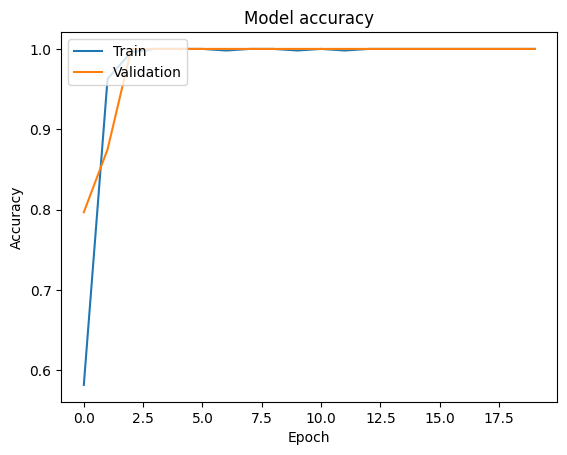

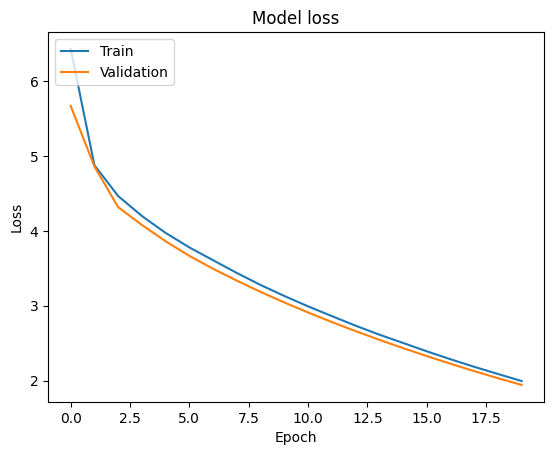

In [ ]:
#TRAINING MODEL ON SET CREATED FROM JUST ONE IMAGE
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the base VGG19 model with pre-trained ImageNet weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the first 15 layers of the base model
for layer in base_model.layers[:15]:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.01)(x)
x = Dropout(0.5)(x)
predictions = Dense(16, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Directory paths
train_dir = r"/content/drive/MyDrive/signature_project/signature_one_set/train"
validation_dir = r"/content/drive/MyDrive/signature_project/signature_one_set/validation"
test_dir = r"/content/drive/MyDrive/signature_project/signature_one_set/test"

# Data generators with enhanced augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    vertical_flip=True,
    brightness_range=[0.5, 1.5]
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Callbacks
checkpoint = ModelCheckpoint(r'/content/drive/MyDrive/signature_project/vgg19_trial_4/vgg19_model_4.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(train_generator, batch_size=32,
                    validation_data=validation_generator, validation_batch_size=32,
                    epochs=20, callbacks=[checkpoint, early_stopping, reduce_lr])

# Load the best model
model.load_weights(r'/content/drive/MyDrive/signature_project/vgg19_trial_4/vgg19_model_4.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_accuracy}')

# Generate predictions for the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Plot loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#TESTING MODEL ON INFERENCE DATASET
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Load the trained model
model_path = "/content/drive/MyDrive/signature_project/vgg19_trial_4/vgg19_model_4.h5"
model = tf.keras.models.load_model(model_path)

# Directory paths
train_dir = "/content/drive/MyDrive/signature_project/signature_dataset_flipped/train"
# new_test_dir = "/content/drive/MyDrive/signature_project/new_test"

# Create class indices dictionary
class_indices = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(train_dir)))}
reverse_class_indices = {v: k for k, v in class_indices.items()}

# Function to preprocess and predict the class of an input image
def predict_signature_class(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale image

    # Make prediction
    predictions = model.predict(img_array)
    top_5_indices = np.argsort(predictions[0])[-5:][::-1]
    top_5_classes = [reverse_class_indices[idx] for idx in top_5_indices]
    top_5_probabilities = predictions[0][top_5_indices]
    return list(zip(top_5_classes, top_5_probabilities))

# List of image paths to test
image_paths = [
    r"/content/drive/MyDrive/signature_project/new_test/Aditya/Aditya_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Aditya/Aditya_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Aditya/Aditya_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Aditya/Aditya_4.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepak/Deepak_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepak/Deepak_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepak/Deepak_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepak/Deepak_4.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepam/Deepam_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepam/Deepam_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepam/Deepam_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Deepam/Deepam_4.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Harsh/Harsh_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Harsh/Harsh_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Harsh/Harsh_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Harsh/Harsh_4.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Himavarshini/Himavarshini_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Himavarshini/Himavarshini_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Himavarshini/Himavarshini_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Himavarshini/Himavarshini_4.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Nikita/Nikita_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Nikita/Nikita_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Nikita/Nikita_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Nikita/Nikita_4.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rishav/Rishav_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rishav/Rishav_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rishav/Rishav_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rishav/Rishav_4.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rudraksh/Rudraksh_1.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rudraksh/Rudraksh_2.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rudraksh/Rudraksh_3.bmp",
    r"/content/drive/MyDrive/signature_project/new_test/Rudraksh/Rudraksh_4.bmp"
]


# Predict and print the class for each image
for image_path in image_paths:
    top_5_predictions = predict_signature_class(image_path)
    print(f"The top 5 predicted classes for the image '{os.path.basename(image_path)}' are:")
    for class_name, probability in top_5_predictions:
        print(f"  {class_name} ==> {probability}")
    print("\n")


1/1 [==============================] - 1s 1s/step
The top 5 predicted classes for the image 'Aditya_1.bmp' are:
  Himavarshini ==> 0.2728709876537323
  Priyadarshan ==> 0.24073049426078796
  Rajasabi ==> 0.2295980602502823
  Ayushi ==> 0.059209294617176056
  Harsh ==> 0.03977213799953461


1/1 [==============================] - 0s 19ms/step
The top 5 predicted classes for the image 'Aditya_2.bmp' are:
  Rajasabi ==> 0.46967190504074097
  Priyadarshan ==> 0.16755452752113342
  Himavarshini ==> 0.12029583752155304
  Harsh ==> 0.04815591871738434
  Deepam ==> 0.041300345212221146


1/1 [==============================] - 0s 18ms/step
The top 5 predicted classes for the image 'Aditya_3.bmp' are:
  Rajasabi ==> 0.3764092028141022
  Priyadarshan ==> 0.20854851603507996
  Himavarshini ==> 0.14878970384597778
  Harsh ==> 0.0577307753264904
  Deepam ==> 0.04860908165574074


1/1 [==============================] - 0s 18ms/step
The top 5 predicted classes for the image 'Aditya_4.bmp' are:
  Rajasa